# Leverage points

Model with Mansions:
Intercept: -225040.03
House Size Coefficient: 114.5881



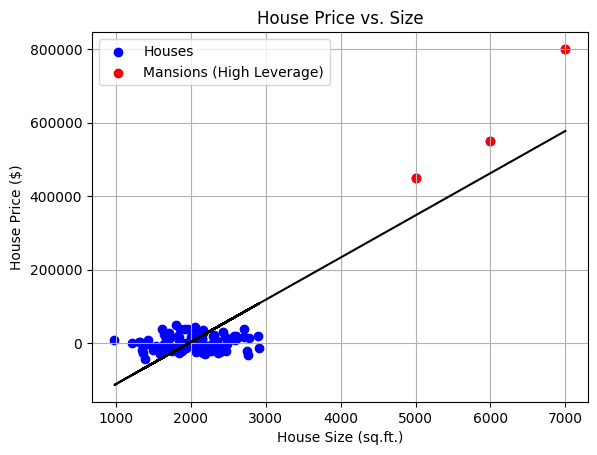

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Add a few mansions
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])  # not necessarily following the previous linear trend

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

# Printing parameters for the model with mansions
print("Model with Mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"House Size Coefficient: {model.params[1]:.4f}\n")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.scatter(house_size[-3:], house_price[-3:], color='red', label='Mansions (High Leverage)')
plt.plot(house_size, model.params[0] + model.params[1] * house_size, color='black')
plt.title('House Price vs. Size')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Model without Mansions:
Intercept: -9866.78
House Size Coefficient: 6.2349


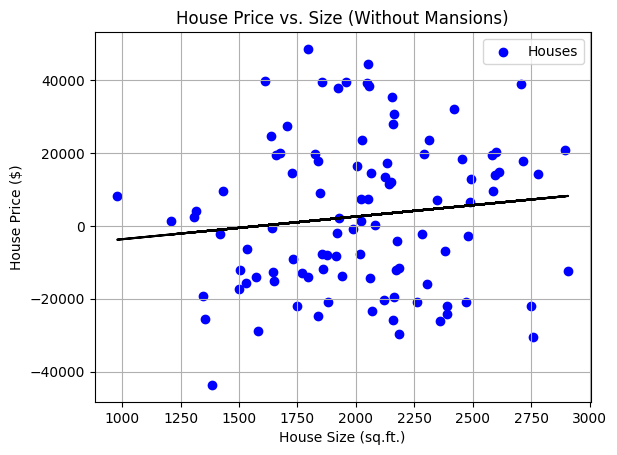

In [3]:
# Generate synthetic data (without the mansions)
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Fit a linear regression model
X = sm.add_constant(house_size)
model_without_mansions = sm.OLS(house_price, X).fit()

# Printing parameters for the model without mansions
print("Model without Mansions:")
print(f"Intercept: {model_without_mansions.params[0]:.2f}")
print(f"House Size Coefficient: {model_without_mansions.params[1]:.4f}")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.plot(house_size, model_without_mansions.params[0] + model_without_mansions.params[1] * house_size, color='black')
plt.title('House Price vs. Size (Without Mansions)')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


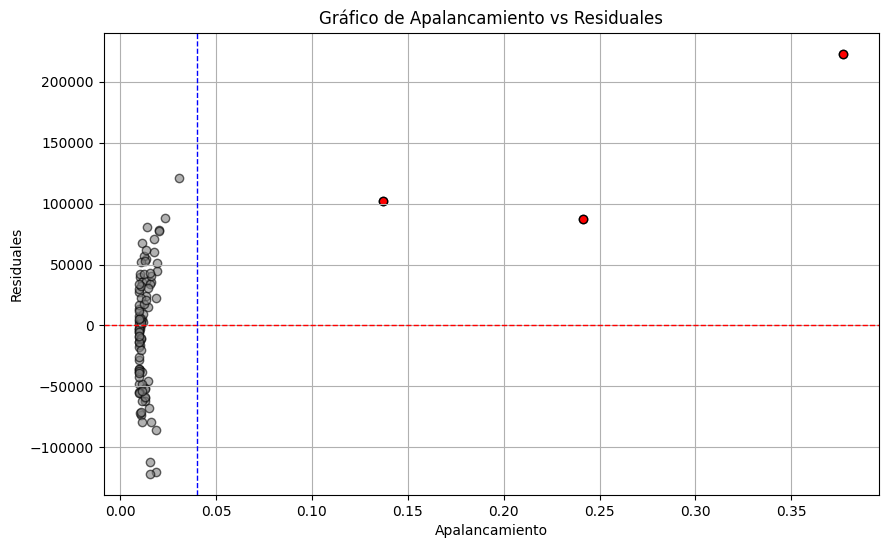

Observaciones con alto apalancamiento: [100 101 102]
Valores de apalancamiento: [0.13694378 0.24146323 0.37708716]


In [4]:
# Obtener valores de apalancamiento (diagonal de la matriz H) y residuales
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Calcular el umbral para puntos de apalancamiento alto
n = len(house_price)
p = X.shape[1]  # número de predictores + intercepto
threshold = 2 * p / n

# Gráfico de apalancamiento vs residuales
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Apalancamiento')
plt.ylabel('Residuales')
plt.title('Gráfico de Apalancamiento vs Residuales')
plt.grid(True)

# Resaltar puntos con alto apalancamiento (mansiones)
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], edgecolor='k', facecolor='red')

plt.show()

# Imprimir puntos con alto apalancamiento
print(f"Observaciones con alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")

# Exercise 1

Use the Boston Housing dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.

# Exercise 2

Use the diamonds dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.